In [1]:
import pandas as pd

# Replace with your actual Excel file name
file_path = "user_comments.xlsx"

# Load the Excel file
ed_comments = pd.read_excel(file_path)

# Display the first 5 rows
print(ed_comments.head())

       username                                       comment_body  score  \
0  SolidLow9296  Companies don’t care about the welfare of comm...      1   
1  SolidLow9296  Aw man, the only position open for Canada has ...      1   
2  SolidLow9296  I mean yes I got a pet gate to split the house...      1   
3  SolidLow9296  Would you say I’m being too pessimistic? I def...      1   
4  SolidLow9296  What are some of your interests? Including it ...      1   

          created_utc  
0 2025-04-26 16:06:57  
1 2025-04-26 03:58:44  
2 2024-10-28 02:07:24  
3 2024-10-28 01:18:47  
4 2024-08-17 12:27:19  


In [2]:
import pandas as pd

# Replace with your actual Excel file name
file_path = "recover_user_comments.xlsx"

# Load the Excel file
recover_comments = pd.read_excel(file_path)

# Display the first 5 rows
print(recover_comments.head())

               username                                       comment_body  \
0  Embarrassed-Local-79  Thank you so much for taking the time and ener...   
1  Embarrassed-Local-79  If you know deep down something was wrong, the...   
2  Embarrassed-Local-79  Thank you for the guidance! It worked, I manag...   
3  Embarrassed-Local-79  There was definitely some dirt but managed to ...   
4  Embarrassed-Local-79  Do you mean more freestyle and improvisation a...   

   score         created_utc  
0      2 2025-06-09 23:47:18  
1      2 2025-06-09 00:45:41  
2      2 2025-05-09 15:39:17  
3      1 2025-05-09 15:27:57  
4      1 2025-05-03 21:52:26  


In [3]:
# Replace with your actual Excel file name
file_path = "user_posts.xlsx"

# Load the Excel file
ed_posts = pd.read_excel(file_path)

# Display the first 5 rows
print(ed_posts.head())

       username                                       title  \
0  SolidLow9296  Missing Graduation Because of Self-Loathe?   
1  SolidLow9296               How do I get started (Canada)   
2  SolidLow9296                        CPA (Canada) Inquiry   
3  SolidLow9296                         Emailing Recruiter    
4  SolidLow9296                              Furniture move   

                                                body  score  \
0  Hey everyone,\n\nI graduate on Thursday (bache...      4   
1  Does anyone have any advice on how to actually...      6   
2  Is the only way to become CPA licensed by work...      0   
3  Is it generally discouraged to email a recruit...      2   
4  I wanna move some furniture including my L sha...      0   

                                                 url  created_utc  \
0  https://reddit.com/r/EatingDisorders/comments/...   1749352117   
1  https://reddit.com/r/AMLCompliance/comments/1k...   1745637667   
2  https://reddit.com/r/Accounting/

In [4]:
# Replace with your actual Excel file name
file_path = "recover_user_posts.xlsx"

# Load the Excel file
recover_posts = pd.read_excel(file_path)

# Display the first 5 rows
print(recover_posts.head())

               username                                              title  \
0  Embarrassed-Local-79  I'm afraid my sister's ED is causing me to rel...   
1  Embarrassed-Local-79  (TW ED) I fear relapsing because of my sister'...   
2  Embarrassed-Local-79        Canon EOS 7D: help needed to clean the lens   
3  Embarrassed-Local-79           What can I do to become a better dancer?   
4  Embarrassed-Local-79  Copenhagen weekend: how much should I budget f...   

                                                body  score  \
0  \nMy sister (16F) has been recently diagnosed ...      6   
1  My sister (16F) has been recently diagnosed as...      1   
2  Hi guys!\n\nWarning: I do not know my way arou...      4   
3  Hi! I want to know if any skilled or experienc...      3   
4  Hi guys!! I'm planning a weekend with a friend...      3   

                                                 url  created_utc  
0  https://reddit.com/r/EatingDisorders/comments/...   1749429745  
1  https://reddi

In [5]:
import pandas as pd

# Replace with your actual Excel file name
ed_file_path = "user_profiles.xlsx"

# Load the Excel file
ed_profile = pd.read_excel(ed_file_path)

# Display the first 5 rows
print(ed_profile.head())

           username  bio  link_karma  comment_karma  \
0      SolidLow9296  NaN        19.0           72.0   
1     yoidrathernot  NaN      2716.0         7272.0   
2           Fiona_9  NaN       472.0          965.0   
3            pbx_01  NaN       507.0          638.0   
4  flightless_moths  NaN         1.0            0.0   

                                    trophies  
0                              One-Year Club  
1  Five-Year Club, Place '22, Verified Email  
2                              Two-Year Club  
3             Five-Year Club, Verified Email  
4                                        NaN  


In [6]:
import pandas as pd

# Replace with your actual Excel file name
recover_file_path = "recover_user_profiles.xlsx"

# Load the Excel file
recover_profile = pd.read_excel(recover_file_path)

# Display the first 5 rows
print(recover_profile.head())

               username                      bio  link_karma  comment_karma  \
0  Embarrassed-Local-79                      NaN         6.0           30.0   
1  Traditional-Touch503                      NaN       202.0           71.0   
2       Tough-Spot-3972                      NaN        44.0            9.0   
3          sillyshark04                      NaN         4.0            2.0   
4    Minimum_Plastic886  i'm trying to be better      4610.0         1764.0   

          trophies  
0  Three-Year Club  
1  Three-Year Club  
2   Four-Year Club  
3              NaN  
4    One-Year Club  


In [7]:
import pandas as pd

# Step 1: Group and concatenate comments by user
ed_comments_grouped = ed_comments.groupby('username')['comment_body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Step 2: Group and concatenate posts by user
ed_posts_grouped = ed_posts.groupby('username')['body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Step 3: Merge both by username
ed_combined = pd.merge(ed_comments_grouped, ed_posts_grouped, on='username', how='outer')

# Step 4: Optionally combine comment + post text into a single field
ed_combined['full_text'] = ed_combined[['comment_body', 'body']].fillna('').agg(' '.join, axis=1)

print(ed_combined.head())
# Optional: drop the separate fields if only full_text is needed
# ed_combined = ed_combined[['username', 'full_text']]

               username                                       comment_body  \
0    --TheKingOfCards--  ![gif](giphy|muNcDSuINVr1e)\n\nbig boss? can y...   
1           123RoSeY321  Dennis I HAVE DONE THIS SO MANY TIMES!!! Some ...   
2                3dacc_  Noted thank uuu!!! This made me cry…you should...   
3              3lis3min  yes. he was always a good captain and leader. ...   
4  5Fingers_In_UrFather  Shiny female starters are my favorite that pla...   

                                                body  \
0  Had my schedule for the day screwed up, which ...   
1  Today I have been thinking about food and my b...   
2  Peaches isn’t even showing up??😭I already trie...   
3  im transferring to a university this fall and ...   
4  Can it prematurely age you like drinking, smok...   

                                           full_text  
0  ![gif](giphy|muNcDSuINVr1e)\n\nbig boss? can y...  
1  Dennis I HAVE DONE THIS SO MANY TIMES!!! Some ...  
2  Noted thank uuu!!! This ma

In [8]:
# Step 1: Group and concatenate comments by user
recover_comments_grouped = recover_comments.groupby('username')['comment_body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Step 2: Group and concatenate posts by user
recover_posts_grouped = recover_posts.groupby('username')['body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Step 3: Merge both by username
recover_combined = pd.merge(recover_comments_grouped, recover_posts_grouped, on='username', how='outer')

# Step 4: Optionally combine comment + post text into a single field
recover_combined['full_text'] = recover_combined[['comment_body', 'body']].fillna('').agg(' '.join, axis=1)

print(recover_combined.head())
# Optional: drop the separate fields if only full_text is needed
# ed_combined = ed_combined[['username', 'full_text']]

         username                                       comment_body  \
0    -maquixtia2-  Finally moved in with my boyfriend after 4 yea...   
1           -maru  Caloric beverages, maybe, if you're finding ea...   
2  0nceUponATime0  everyone is different but honestly probably no...   
3         1-kit-1                                                NaN   
4        1735user  You’re still relatively early in the process, ...   

                                                body  \
0  I really really want to binge but I’m two mont...   
1  I’ve only heard good things about the S1 on th...   
2  [removed] [removed] im about six months into r...   
3  I am a trans guy and am having some trouble fi...   
4  Just looking for any advice or support from ot...   

                                           full_text  
0  Finally moved in with my boyfriend after 4 yea...  
1  Caloric beverages, maybe, if you're finding ea...  
2  everyone is different but honestly probably no...  
3   I am a

In [9]:
import re

def minimal_clean(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)        # remove URLs
    text = re.sub(r'!\[.*?\]\(.*?\)', '', text)                # remove markdown images
    text = re.sub(r'\n+', ' ', text)                           # normalize newlines
    return text

ed_combined['full_text_cleaned'] = ed_combined['full_text'].apply(minimal_clean)
ed_combined.head(1)['full_text_cleaned']

0     big boss? can you show us your process for co...
Name: full_text_cleaned, dtype: object

In [34]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000

def clean_text_spacy(text):
    if pd.isna(text): return ""
    doc = nlp(text)
    tokens = [t.text.lower() for t in doc if t.is_alpha and not t.is_stop]
    return ' '.join(tokens)

ed_combined['full_text_cleaned'] = ed_combined['full_text'].apply(clean_text_spacy)

In [40]:
print(ed_combined.loc[3, 'full_text_cleaned'])  # for user -maquixtia2-

different honestly probably healthy ways lose weight exist history disordered eating nearly impossible lose weight mentally physically healthy way obsessive vast majority recoverees turned fitness girlies social media extremely disordered know wish gotten mental help deserve mental help unfortunately actually possible brain literally respond learn therapy malnourished need weight restore recovering trust worth want lose belly fat sure need healthy ways restriction helps push away m currently recovery stomach bigger weight lower uneven weight distribution ed literally exact opposite want scream eating disorder suggest recovery holistic include aspects health saying people eat hungry eat types foods want saying time set long term health issues complications indigestion severely painful permanent disordered suggest people wait hour eating lie sleep exactly eating mechanically surplus gain weight eventually cues saying want recommended surplus makes gain lbs week opposed eating like calori

### Internet Slang/emoji conversion

In [10]:
slang_modified_df = pd.read_csv("internet_slang_modified.csv")

# Display the first few rows of the modified DataFrame
print(slang_modified_df.head())

    Term            Definition
0      $                 Money
1    $_$             Has money
2     %)                 Drunk
3      &                   And
4  &APOS  Wrongly displayed 's


In [11]:
# Make all slang terms lowercase
slang_modified_df['Term'] = slang_modified_df['Term'].str.lower()
slang_modified_df['Definition'] = slang_modified_df['Definition'].str.lower()

print(slang_modified_df.head())

    Term            Definition
0      $                 money
1    $_$             has money
2     %)                 drunk
3      &                   and
4  &apos  wrongly displayed 's


In [49]:
import emoji
import re
import string
import unicodedata

# Convert the slang dictionary into a Python dictionary
slang_dict = dict(zip(slang_modified_df['Term'].str.lower(), slang_modified_df['Definition']))

def replace_slang(text):
    if not isinstance(text, str):
        return text

    # Convert emojis to text (e.g., 🍷 -> ":wine_glass:")
    text = emoji.demojize(text, language='en')

    # Lowercase the text
    text = text.lower()

    # Replace slang terms word by word
    words = text.split()
    expanded = [slang_dict.get(word, word) for word in words]
    text = ' '.join(expanded)

    # Remove all punctuation including unicode
    text = ''.join(
        ch if not unicodedata.category(ch).startswith('P') else ' '
        for ch in text
    )

    # Remove punctuation using regex (replace all punctuation with space)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)

    # Normalize multiple spaces to one
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply the replacement to the 'bio' column
ed_combined['full_text_expanded'] = ed_combined['full_text_cleaned'].apply(replace_slang)

# Display the updated DataFrame
print(ed_combined[['username', 'full_text_expanded']].head())

             username  \
0  --TheKingOfCards--   
1        -maquixtia2-   
2               -maru   
3      0nceUponATime0   
4         123RoSeY321   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [11]:
import emoji

# Convert the slang dictionary into a Python dictionary
slang_dict = dict(zip(slang_modified_df['Term'].str.lower(), slang_modified_df['Definition']))

def only_replace_slang_emoji(text):
    if not isinstance(text, str):
        return text

    # Convert emojis to text (e.g., 🍷 -> ":wine_glass:")
    text = emoji.demojize(text, language='en')

    # Lowercase the text
    text = text.lower()

    # Replace slang terms word by word
    words = text.split()
    expanded = [slang_dict.get(word, word) for word in words]
    text = ' '.join(expanded)

    return text


# Apply the replacement to the 'bio' column
ed_combined['full_text_cleaned'] = ed_combined['full_text'].apply(only_replace_slang_emoji)

# Display the updated DataFrame
print(ed_combined[['username', 'full_text_cleaned']].head())

               username                                  full_text_cleaned
0    --TheKingOfCards--  ![gif](giphy|muncdsuinvr1e) Great, really good...
1           123RoSeY321  dennis i have FinishedDrunk, intoxicated this ...
2                3dacc_  noted thank uuu!!! this made me cry…you should...
3              3lis3min  yes. Happy Ending, High Explosives Wait And Se...
4  5Fingers_In_UrFather  shiny female starters are Miss You favorite th...


In [12]:
# Apply the replacement to the 'bio' column
recover_combined['full_text_cleaned'] = recover_combined['full_text'].apply(only_replace_slang_emoji)

# Display the updated DataFrame
print(recover_combined[['username', 'full_text_cleaned']].head())

         username                                  full_text_cleaned
0    -maquixtia2-  finally moved in with Miss You boyfriend after...
1           -maru  caloric beverages, maybe, if you're finding ea...
2  0nceUponATime0  everyone is different but honestly probably no...
3         1-kit-1  i am a trans guy and am having some trouble fi...
4        1735user  you’re still relatively early in the process, ...


### linguistic features extraction

In [13]:
import spacy
import pandas as pd
from statistics import median

nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    if pd.isna(text):
        return {}

    doc = nlp(text)

    # Token-level counters
    first_sing_pron = 0
    first_plur_pron = 0
    second_sing_pron = 0
    second_plur_pron = 0
    third_sing_pron = 0
    third_plur_pron = 0
    impersonal_pron = 0
    personal_pron = 0
    total_pron = 0

    verbs = 0
    past_tense = 0
    present_tense = 0
    future_tense = 0
    third_person_verbs = 0
    first_sing_verbs = 0
    first_plur_verbs = 0
    second_person_verbs = 0

    negations = 0
    affirmations = 0  # requires custom word list
    adverbs = 0
    articles = 0
    prepositions = 0

    sentence_lengths = []

    future_markers = {'will', 'shall', "'ll"}

    for sent in doc.sents:
        sentence_lengths.append(len(sent))

    for token in doc:
        if token.pos_ == "PRON":
            total_pron += 1
            if token.text.lower() in ["i", "me", "my", "mine"]:
                first_sing_pron += 1
                personal_pron += 1
            elif token.text.lower() in ["we", "us", "our", "ours"]:
                first_plur_pron += 1
                personal_pron += 1
            elif token.text.lower() in ["you", "your", "yours"]:
                second_sing_pron += 1
                personal_pron += 1
            elif token.text.lower() in ["he", "she", "him", "her", "his", "hers", "it", "its"]:
                third_sing_pron += 1
                personal_pron += 1
            elif token.text.lower() in ["they", "them", "their", "theirs"]:
                third_plur_pron += 1
                personal_pron += 1
            elif token.text.lower() in ["someone", "anyone", "everyone", "something", "nothing"]:
                impersonal_pron += 1

        if token.pos_ == "VERB":
            verbs += 1
            # tense
            if token.tag_ in ["VBD", "VBN"]:
                past_tense += 1
            elif token.tag_ in ["VBP", "VBZ"]:
                present_tense += 1
            elif token.text.lower() in future_markers:
                future_tense += 1

            # subject-related dependencies (only approximate without full parser)
            if token.dep_ == "nsubj":
                subj = token.head.text.lower()
                if subj in ["i", "me", "my"]:
                    first_sing_verbs += 1
                elif subj in ["we", "us", "our"]:
                    first_plur_verbs += 1
                elif subj in ["you", "your"]:
                    second_person_verbs += 1
                elif subj in ["he", "she", "they", "it", "his", "her"]:
                    third_person_verbs += 1

        if token.dep_ == "neg":
            negations += 1
        if token.text.lower() in {"yes", "sure", "definitely", "absolutely"}:
            affirmations += 1
        if token.pos_ == "ADV":
            adverbs += 1
        if token.tag_ in ["DT"]:
            articles += 1
        if token.pos_ == "ADP":
            prepositions += 1

    return {
        "first_person_singular_pronouns": first_sing_pron,
        "first_person_plural_pronouns": first_plur_pron,
        "second_person_singular_pronouns": second_sing_pron,
        "second_person_plural_pronouns": second_plur_pron,  # not differentiated in English
        "third_person_singular_pronouns": third_sing_pron,
        "third_person_plural_pronouns": third_plur_pron,
        "personal_pronouns": personal_pron,
        "impersonal_pronouns": impersonal_pron,
        "total_pronouns": total_pron,

        "first_person_singular_verbs": first_sing_verbs,
        "first_person_plural_verbs": first_plur_verbs,
        "second_person_verbs": second_person_verbs,
        "third_person_verbs": third_person_verbs,

        "verbs": verbs,
        "past_tense_verbs": past_tense,
        "present_tense_verbs": present_tense,
        "future_tense_verbs": future_tense,

        "negations": negations,
        "affirmations": affirmations,
        "adverbs": adverbs,
        "articles": articles,
        "prepositions": prepositions,
        "median_sentence_length": median(sentence_lengths) if sentence_lengths else 0
    }

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000  # set high enough to handle long texts

# Step 1: Slice the first 100 users
ed_subset = ed_combined.copy()  # or ed_combined.iloc[:100]

# Step 2: Apply feature extraction only to that subset
feature_rows = ed_subset['full_text_cleaned'].apply(extract_features)
features_df = pd.DataFrame(feature_rows.tolist())

# Step 3: Combine with usernames
result_df = pd.concat([ed_subset[['username']], features_df], axis=1)

# Display the first few rows of the result DataFrame
print(result_df.head())

               username  first_person_singular_pronouns  \
0    --TheKingOfCards--                             433   
1           123RoSeY321                             384   
2                3dacc_                              28   
3              3lis3min                             323   
4  5Fingers_In_UrFather                              93   

   first_person_plural_pronouns  second_person_singular_pronouns  \
0                             8                              277   
1                             5                              232   
2                             0                               12   
3                             1                               96   
4                             2                               80   

   second_person_plural_pronouns  third_person_singular_pronouns  \
0                              0                             124   
1                              0                              77   
2                              0

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3_000_000  # set high enough to handle long texts

# Step 1: Slice the first 100 users
recover_linguistic_subset = recover_combined.copy()  # or ed_combined.iloc[:100]

# Step 2: Apply feature extraction only to that subset
recover_linguistic_feature_rows = recover_linguistic_subset['full_text_cleaned'].apply(extract_features)
recover_linguistic_features_df = pd.DataFrame(recover_linguistic_feature_rows.tolist())

# Step 3: Combine with usernames
recover_linguistic_result_df = pd.concat([recover_linguistic_subset[['username']], recover_linguistic_features_df], axis=1)

# Display the first few rows of the result DataFrame
print(recover_linguistic_result_df.head())

         username  first_person_singular_pronouns  \
0    -maquixtia2-                             119   
1           -maru                            2473   
2  0nceUponATime0                            1733   
3         1-kit-1                              19   
4        1735user                              59   

   first_person_plural_pronouns  second_person_singular_pronouns  \
0                             1                              123   
1                            75                             1958   
2                            32                              770   
3                             0                                3   
4                             9                              142   

   second_person_plural_pronouns  third_person_singular_pronouns  \
0                              0                              84   
1                              0                             725   
2                              0                            2513   


### emotional/cognitive analysis

In [20]:
from empath import Empath
from nrclex import NRCLex
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize
lexicon = Empath()
sia = SentimentIntensityAnalyzer()

# ✅ Manually create/override Empath categories with relevant word lists
lexicon.create_category("anxiety", ["anxious", "nervous", "afraid", "worried", "tense", "panicked", "uneasy"])
lexicon.create_category("cognitive_processes", ["think", "know", "understand", "believe", "remember", "concentrate"])
lexicon.create_category("cause", ["because", "cause", "reason", "therefore", "due", "thus", "hence"])
lexicon.create_category("insight", ["realize", "notice", "aware", "understand", "recognize", "observe"])
lexicon.create_category("discrepancy", ["should", "would", "could", "if", "ought", "maybe", "might"])
lexicon.create_category("tentative", ["perhaps", "maybe", "possibly", "guess", "think", "assume"])
lexicon.create_category("certainty", ["always", "never", "definitely", "certainly", "undoubtedly"])
lexicon.create_category("perception", ["see", "hear", "feel", "touch", "smell", "taste"])
lexicon.create_category("see", ["see", "look", "observe", "view", "watch", "notice"])
lexicon.create_category("hear", ["hear", "listen", "sound", "overhear"])
lexicon.create_category("feel", ["feel", "sense", "touch", "emotion", "sensation"])
lexicon.create_category("social", ["friend", "family", "group", "together", "community", "talk", "share", "social"])
# lexicon.create_category("friends", ["friend", "buddy", "pal", "mate", "bros", "bff"])
# lexicon.create_category("family", ["family", "mother", "father", "mom", "dad", "sister", "brother", "parent", "aunt", "uncle"])

def extract_all_features(text):
    if pd.isna(text) or len(text.strip()) == 0:
        return {k: 0 for k in [
            # LIWC-style via Empath
            'swearing', 'positive_emotion_liwc', 'negative_emotion_liwc', 'anxiety', 'cognitive_processes',
            'cause', 'insight', 'discrepancy', 'tentative', 'certainty',
            'perception', 'see', 'hear', 'feel', 'social', 'friends', 'family', 'absolutist_terms',
            # EmoLex
            'joy', 'trust', 'fear', 'surprise', 'sadness', 'anger', 'anticipation', 'disgust',
            'positive_emolex', 'negative_emolex',
            # VADER
            'sentiment_compound'
        ]}

    # 1. Empath categories
    empath_features = lexicon.analyze(text.lower(), categories=[
        "swearing_terms", "positive_emotion", "negative_emotion", "anxiety", "cognitive_processes",
        "cause", "insight", "discrepancy", "tentative", "certainty",
        "perception", "see", "hear", "feel", "social", "friends", "family"
    ], normalize=True)

    # 2. Custom absolutist term count
    absolutist_terms = [
        "always", "never", "completely", "absolutely", "entirely", "totally", "nothing", "all", "none", "everyone"
    ]
    absolutist_count = sum(1 for word in text.lower().split() if word in absolutist_terms)

    # 3. EmoLex emotion counts
    emolex = NRCLex(text)
    raw_emo = emolex.raw_emotion_scores
    emolex_features = {emo: raw_emo.get(emo, 0) for emo in [
        'joy', 'trust', 'fear', 'surprise', 'sadness',
        'anger', 'anticipation', 'disgust', 'positive', 'negative'
    ]}
    emolex_features['positive_emolex'] = emolex_features.pop('positive')
    emolex_features['negative_emolex'] = emolex_features.pop('negative')

    # 4. Sentiment polarity from VADER
    vader_scores = sia.polarity_scores(text)

    return {
        # Empath (LIWC-like)
        'swearing': empath_features["swearing_terms"],
        'positive_emotion_liwc': empath_features["positive_emotion"],
        'negative_emotion_liwc': empath_features["negative_emotion"],
        'anxiety': empath_features["anxiety"],
        'cognitive_processes': empath_features["cognitive_processes"],
        'cause': empath_features["cause"],
        'insight': empath_features["insight"],
        'discrepancy': empath_features["discrepancy"],
        'tentative': empath_features["tentative"],
        'certainty': absolutist_count,
        'perception': empath_features["perception"],
        'see': empath_features["see"],
        'hear': empath_features["hear"],
        'feel': empath_features["feel"],
        'social': empath_features["social"],
        'friends': empath_features["friends"],
        'family': empath_features["family"],

        # EmoLex
        **emolex_features,

        # VADER
        'sentiment_compound': vader_scores['compound']
    }

["anxious", "nervous", "worried", "uneasy", "frightened", "scared", "worried", "apprehensive", "relieved", "curious", "tense", "upset", "uncomfortable", "terrified", "concerned", "disappointed", "agitated", "angry", "confused", "fidgety", "unsure", "surprised", "panicked", "wary", "antsy", "embarrassed", "irritated", "suspicious", "paranoid", "distressed", "panicky", "terrified", "unsettled", "cautious", "hesitant", "alarmed", "uncertain", "flustered", "afraid", "frustrated", "confused", "fearful", "jumpy", "frantic", "jittery", "annoyed", "shocked", "relived", "scared", "tensed", "frightened", "relieved", "unnerved", "petrified", "distraught", "guilty", "furious", "hopeful", "conflicted", "troubled", "unhappy", "panicked", "stressed", "intrigued", "sympathetic", "shocked", "overwhelmed", "skittish", "sad", "restless", "freaked", "skeptical", "stressed", "distracted", "confident", "impatient", "puzzled", "dissapointed", "sick", "upset", "panicking", "reluctant", "aggravated", "elated",

In [21]:
# Optionally limit to 100 users
subset = ed_combined.copy()

# Apply function
all_feature_dicts = subset['full_text_cleaned'].apply(extract_all_features)
all_features_df = pd.DataFrame(all_feature_dicts.tolist())

# Combine with usernames
result = pd.concat([subset[['username']], all_features_df], axis=1)

print(result.head())
# Save to CSV
# result.to_csv("ed_user_psycholinguistic_features.csv", index=False)

               username  swearing  positive_emotion_liwc  \
0    --TheKingOfCards--  0.004364               0.012349   
1           123RoSeY321  0.000351               0.014724   
2                3dacc_  0.000000               0.010283   
3              3lis3min  0.000517               0.012743   
4  5Fingers_In_UrFather  0.001412               0.015884   

   negative_emotion_liwc   anxiety  cognitive_processes     cause   insight  \
0               0.012906  0.001671             0.025441  0.015692  0.007799   
1               0.012095  0.003856             0.033304  0.030324  0.010342   
2               0.012853  0.005141             0.017995  0.007712  0.005141   
3               0.009299  0.002755             0.034613  0.028931  0.012227   
4               0.007060  0.001412             0.026121  0.026474  0.009884   

   discrepancy  tentative  ...  trust  fear  surprise  sadness  anger  \
0     0.014113   0.017456  ...    331   183       131      154    171   
1     0.027695   0

In [22]:
pd.set_option('display.max_rows', 100)  # show up to 100 rows
pd.set_option('display.max_columns', None)
print(result)

                  username  swearing  positive_emotion_liwc  \
0       --TheKingOfCards--  0.004364               0.012349   
1              123RoSeY321  0.000351               0.014724   
2                   3dacc_  0.000000               0.010283   
3                 3lis3min  0.000517               0.012743   
4     5Fingers_In_UrFather  0.001412               0.015884   
...                    ...       ...                    ...   
1438            ysabellax_  0.005263               0.005263   
1439            yurriichan  0.000000               0.009144   
1440            zenlen2000  0.000897               0.010201   
1441           zodiacqu33n  0.001580               0.009316   
1442                zolwye  0.000569               0.010950   

      negative_emotion_liwc   anxiety  cognitive_processes     cause  \
0                  0.012906  0.001671             0.025441  0.015692   
1                  0.012095  0.003856             0.033304  0.030324   
2                  0.012853

In [23]:
# Optionally limit to 100 users
recover_psych_subset = recover_combined.copy()  # or ed_combined.iloc[:100]

# Apply function
recover_psych_feature_dicts = subset['full_text_cleaned'].apply(extract_all_features)
recover_psych_features_df = pd.DataFrame(recover_psych_feature_dicts.tolist())

# Combine with usernames
recover_psych_result = pd.concat([recover_psych_subset[['username']], recover_psych_features_df], axis=1)

print(recover_psych_result.head())
# Save to CSV
# result.to_csv("ed_user_psycholinguistic_features.csv", index=False)

         username  swearing  positive_emotion_liwc  negative_emotion_liwc  \
0    -maquixtia2-  0.004364               0.012349               0.012906   
1           -maru  0.000351               0.014724               0.012095   
2  0nceUponATime0  0.000000               0.010283               0.012853   
3         1-kit-1  0.000517               0.012743               0.009299   
4        1735user  0.001412               0.015884               0.007060   

    anxiety  cognitive_processes     cause   insight  discrepancy  tentative  \
0  0.001671             0.025441  0.015692  0.007799     0.014113   0.017456   
1  0.003856             0.033304  0.030324  0.010342     0.027695   0.028747   
2  0.005141             0.017995  0.007712  0.005141     0.017995   0.010283   
3  0.002755             0.034613  0.028931  0.012227     0.020320   0.027897   
4  0.001412             0.026121  0.026474  0.009884     0.014472   0.020826   

   certainty  perception       see      hear      feel  

### interelational features

#### url/mentions

In [24]:
import re

def count_mentions_urls(text):
    if pd.isna(text) or len(text.strip()) == 0:
        return pd.Series({'mention_count': 0, 'url_count': 0})
    
    mentions = re.findall(r'@\w+', text)  # Matches @username
    urls = re.findall(r'https?://\S+|www\.\S+', text)  # Matches most URLs

    return pd.Series({
        'mention_count': len(mentions),
        'url_count': len(urls)
    })

In [25]:
# Select the first 100 rows
ed_sample = ed_combined.copy()

# Apply the mention + URL count function
mention_url_counts = ed_sample['full_text'].apply(count_mentions_urls)

# Merge the counts into the sample
ed_sample = pd.concat([ed_sample, mention_url_counts], axis=1)
ed_sample = ed_sample.fillna(0)

# Display result
print(ed_sample[['username', 'mention_count', 'url_count']].head())

               username  mention_count  url_count
0    --TheKingOfCards--              0          7
1           123RoSeY321              0          2
2                3dacc_              0          0
3              3lis3min              0          1
4  5Fingers_In_UrFather              0          2


In [26]:
# Select the first 100 rows
recover_menurl_sample = recover_combined.copy()  # or ed_combined.iloc[:100]

# Apply the mention + URL count function
recover_mention_url_counts = recover_menurl_sample['full_text'].apply(count_mentions_urls)

# Merge the counts into the sample
recover_menurl_sample = pd.concat([recover_menurl_sample, recover_mention_url_counts], axis=1)

recover_menurl_sample = recover_menurl_sample.fillna(0)

# Display result
print(recover_menurl_sample[['username', 'mention_count', 'url_count']].head())

         username  mention_count  url_count
0    -maquixtia2-              0          0
1           -maru              2        131
2  0nceUponATime0              0          5
3         1-kit-1              0          0
4        1735user              0          0


#### number of posts/comments

In [27]:
# Count the number of posts per user (number of rows per username)
ed_post_counts = ed_posts.groupby('username').size().rename('post_count')

# Count the number of comments per user
ed_comment_counts = ed_comments.groupby('username').size().rename('comment_count')

# Merge counts into one DataFrame
ed_user_activity = pd.concat([ed_post_counts, ed_comment_counts], axis=1).fillna(0).astype(int).reset_index()

# Show result
print(ed_user_activity.head())

               username  post_count  comment_count
0    --TheKingOfCards--          97            893
1           123RoSeY321          42             98
2                3dacc_           8              2
3              3lis3min          21             84
4  5Fingers_In_UrFather           9            198


In [28]:
# Count the number of posts per user (number of rows per username)
recover_post_counts = recover_posts.groupby('username').size().rename('post_count')

# Count the number of comments per user
recover_comment_counts = recover_comments.groupby('username').size().rename('comment_count')

# Merge counts into one DataFrame
recover_user_activity = pd.concat([recover_post_counts, recover_comment_counts], axis=1).fillna(0).astype(int).reset_index()

# Show result
print(recover_user_activity.head())

         username  post_count  comment_count
0    -maquixtia2-           3            117
1           -maru          87            939
2  0nceUponATime0          66            843
3         1-kit-1           3              0
4        1735user           9             54


#### other engagement

In [29]:
import numpy as np
# Create modified copy
ed_engagement = ed_profile.copy()

# Modify `bio`: NaN → 0, not-NaN → 1
ed_engagement["bio"] = np.where(ed_engagement["bio"].notna(), 1, 0)

# Count number of trophies per user (assuming comma-separated)
ed_engagement["trophy_count"] = ed_engagement["trophies"].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

ed_engagement = ed_engagement[["username", "bio", "link_karma", "comment_karma", "trophy_count"]]

# Show result
print(ed_engagement.head())

           username  bio  link_karma  comment_karma  trophy_count
0      SolidLow9296    0        19.0           72.0             1
1     yoidrathernot    0      2716.0         7272.0             3
2           Fiona_9    0       472.0          965.0             1
3            pbx_01    0       507.0          638.0             2
4  flightless_moths    0         1.0            0.0             0


In [30]:
import numpy as np
# Create modified copy
recover_engagement = recover_profile.copy()

# Modify `bio`: NaN → 0, not-NaN → 1
recover_engagement["bio"] = np.where(recover_engagement["bio"].notna(), 1, 0)

# Count number of trophies per user (assuming comma-separated)
recover_engagement["trophy_count"] = recover_engagement["trophies"].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

# Fill remaining NaNs with 0
recover_engagement = recover_engagement.fillna(0)

recover_engagement = recover_engagement[["username", "bio", "link_karma", "comment_karma", "trophy_count"]]

# Show result
print(recover_engagement.head())

               username  bio  link_karma  comment_karma  trophy_count
0  Embarrassed-Local-79    0         6.0           30.0             1
1  Traditional-Touch503    0       202.0           71.0             1
2       Tough-Spot-3972    0        44.0            9.0             1
3          sillyshark04    0         4.0            2.0             0
4    Minimum_Plastic886    1      4610.0         1764.0             1


### Behavioural features

In [31]:
import pandas as pd

# Combine post and comment data if needed
ed_df = pd.concat([ed_posts, ed_comments])

# Convert Unix time to datetime
ed_df['datetime'] = pd.to_datetime(ed_df['created_utc'])

# Add weekday and hour info
ed_df['dayofweek'] = ed_df['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
ed_df['hour'] = ed_df['datetime'].dt.hour

In [32]:
import pandas as pd

# Combine post and comment data if needed
recover_postcom_combined_df = pd.concat([recover_posts, recover_comments])

# Convert Unix time to datetime
recover_postcom_combined_df['datetime'] = pd.to_datetime(recover_postcom_combined_df['created_utc'])

# Add weekday and hour info
recover_postcom_combined_df['dayofweek'] = recover_postcom_combined_df['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
recover_postcom_combined_df['hour'] = recover_postcom_combined_df['datetime'].dt.hour

In [114]:
import pandas as pd
import numpy as np

def extract_temporal_features(user_df):
    if len(user_df) < 2:
        return pd.Series({
            'week_work_ratio': 0,
            'weekend_ratio': 0,
            'median_time_between': None,
            'sleep_ratio': 0,
            'awake_ratio': 0
        })

    # 1. Week vs Weekend
    weekdays = user_df[user_df['dayofweek'] < 5]
    weekends = user_df[user_df['dayofweek'] >= 5]

    week_work_ratio = len(weekdays) / len(user_df)
    weekend_ratio = len(weekends) / len(user_df)

    # 2. Median time between posts/comments
    sorted_times = user_df['datetime'].sort_values()
    time_deltas = sorted_times.diff().dropna().dt.total_seconds()
    median_time_between = time_deltas.median() if not time_deltas.empty else None

    # 3. Sleep vs Awake using STTR method
    # Create 8 time slots (3 hours each)
    user_df['slot'] = (user_df['hour'] // 3).astype(int)  # 0 to 7

    slot_counts = user_df.groupby('slot').size().reindex(range(8), fill_value=0).values

    # sum of two consecutive slots (with wrap-around for slot 7 -> slot 0)
    pair_sums = [
        slot_counts[i] + slot_counts[(i + 1) % 8]
        for i in range(8)
    ]

    # Find the minimum pair sum (sleep period tweets)
    min_pair_sum = min(pair_sums)

    total_tweets = len(user_df)
    sleep_ratio = min_pair_sum / total_tweets if total_tweets > 0 else 0
    awake_ratio = 1 - sleep_ratio

    return pd.Series({
        'week_work_ratio': week_work_ratio,
        'weekend_ratio': weekend_ratio,
        'median_time_between': median_time_between,
        'sleep_ratio': sleep_ratio,  # STTR
        'awake_ratio': awake_ratio   # DTTR
    })

In [115]:
ed_user_behavioural_features = ed_df.groupby('username').apply(extract_temporal_features).reset_index()

/var/folders/v8/jf6ntvj55z5_r0zhp79lwrhw0000gn/T/ipykernel_1332/635213487.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ed_user_behavioural_features = ed_df.groupby('username').apply(extract_temporal_features).reset_index()


In [116]:
recover_user_behavioural_features = recover_postcom_combined_df.groupby('username').apply(extract_temporal_features).reset_index()

/var/folders/v8/jf6ntvj55z5_r0zhp79lwrhw0000gn/T/ipykernel_1332/1433919803.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recover_user_behavioural_features = recover_postcom_combined_df.groupby('username').apply(extract_temporal_features).reset_index()


In [117]:
ed_user_behavioural_features.head()

,username,week_work_ratio,weekend_ratio,median_time_between,sleep_ratio,awake_ratio
0,--TheKingOfCards--,0.766667,0.233333,18751.000000,0.079798,0.920202
1,123RoSeY321,0.871429,0.128571,993.000000,0.021429,0.978571
2,3dacc_,0.900000,0.100000,0.003901,0.000000,1.000000
3,3lis3min,0.771429,0.228571,79585.500000,0.009524,0.990476
4,5Fingers_In_UrFather,0.661836,0.338164,4319.500000,0.067633,0.932367


In [118]:
recover_user_behavioural_features.head()

,username,week_work_ratio,weekend_ratio,median_time_between,sleep_ratio,awake_ratio
0,-maquixtia2-,0.516667,0.483333,130221.000000,0.125000,0.875000
1,-maru,0.801170,0.198830,74072.000000,0.032164,0.967836
2,0nceUponATime0,0.750275,0.249725,11503.500000,0.085809,0.914191
3,1-kit-1,1.000000,0.000000,0.003806,0.000000,1.000000
4,1735user,0.777778,0.222222,101653.000000,0.015873,0.984127


In [119]:
# Start from results_df
ed_classi_combined = result_df.copy()

# Merge all additional DataFrames on 'username'
ed_classi_combined = ed_classi_combined.merge(result, on="username", how="left")
ed_classi_combined = ed_classi_combined.merge(ed_sample, on="username", how="left")
ed_classi_combined = ed_classi_combined.merge(ed_user_activity, on="username", how="left")
ed_classi_combined = ed_classi_combined.merge(ed_engagement, on="username", how="left")
ed_classi_combined = ed_classi_combined.merge(ed_user_behavioural_features, on="username", how="left")

# Preview result
print(ed_classi_combined.head())

               username  first_person_singular_pronouns  \
0    --TheKingOfCards--                             433   
1           123RoSeY321                             384   
2                3dacc_                              28   
3              3lis3min                             323   
4  5Fingers_In_UrFather                              93   

   first_person_plural_pronouns  second_person_singular_pronouns  \
0                             8                              277   
1                             5                              232   
2                             0                               12   
3                             1                               96   
4                             2                               80   

   second_person_plural_pronouns  third_person_singular_pronouns  \
0                              0                             124   
1                              0                              77   
2                              0

In [120]:
# Start from results_df
recover_classi_combined = recover_linguistic_result_df.copy()

# Merge all additional DataFrames on 'username'
recover_classi_combined = recover_classi_combined.merge(recover_psych_result, on="username", how="left")
recover_classi_combined = recover_classi_combined.merge(recover_menurl_sample, on="username", how="left")
recover_classi_combined = recover_classi_combined.merge(recover_user_activity, on="username", how="left")
recover_classi_combined = recover_classi_combined.merge(recover_engagement, on="username", how="left")
recover_classi_combined = recover_classi_combined.merge(recover_user_behavioural_features, on="username", how="left")

# Preview result
print(recover_classi_combined.head())

         username  first_person_singular_pronouns  \
0    -maquixtia2-                             119   
1           -maru                            2473   
2  0nceUponATime0                            1733   
3         1-kit-1                              19   
4        1735user                              59   

   first_person_plural_pronouns  second_person_singular_pronouns  \
0                             1                              123   
1                            75                             1958   
2                            32                              770   
3                             0                                3   
4                             9                              142   

   second_person_plural_pronouns  third_person_singular_pronouns  \
0                              0                              84   
1                              0                             725   
2                              0                            2513   


In [121]:
ed_classi_combined["label"] = 1
recover_classi_combined["label"] = 2

In [122]:
import pandas as pd

# Combine the two DataFrames
final_df = pd.concat([ed_classi_combined, recover_classi_combined], ignore_index=True)

# Shuffle the rows randomly
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show result
print(final_df.head())

               username  first_person_singular_pronouns  \
0  Antique-Whereas-5311                             290   
1       kittygirlmowmow                              59   
2          MangoDry3670                             717   
3   Gloomy_Mountain_966                             249   
4         igotsnowcones                              58   

   first_person_plural_pronouns  second_person_singular_pronouns  \
0                             0                               94   
1                             1                               24   
2                             8                              493   
3                            10                              182   
4                             0                               24   

   second_person_plural_pronouns  third_person_singular_pronouns  \
0                              0                              20   
1                              0                              16   
2                              0

In [123]:
# List of non-numeric columns to drop
text_cols_to_drop = ['comment_body', 'body', 'full_text', 'full_text_cleaned']

# Drop them from final_df
final_df = final_df.drop(columns=text_cols_to_drop)

# Confirm change
print("✅ Remaining columns:")
print(final_df.columns.tolist())

✅ Remaining columns:
['username', 'first_person_singular_pronouns', 'first_person_plural_pronouns', 'second_person_singular_pronouns', 'second_person_plural_pronouns', 'third_person_singular_pronouns', 'third_person_plural_pronouns', 'personal_pronouns', 'impersonal_pronouns', 'total_pronouns', 'first_person_singular_verbs', 'first_person_plural_verbs', 'second_person_verbs', 'third_person_verbs', 'verbs', 'past_tense_verbs', 'present_tense_verbs', 'future_tense_verbs', 'negations', 'affirmations', 'adverbs', 'articles', 'prepositions', 'median_sentence_length', 'swearing', 'positive_emotion_liwc', 'negative_emotion_liwc', 'anxiety', 'cognitive_processes', 'cause', 'insight', 'discrepancy', 'tentative', 'certainty', 'perception', 'see', 'hear', 'feel', 'social', 'friends', 'family', 'joy', 'trust', 'fear', 'surprise', 'sadness', 'anger', 'anticipation', 'disgust', 'positive_emolex', 'negative_emolex', 'sentiment_compound', 'mention_count', 'url_count', 'post_count', 'comment_count', 'b

In [124]:
# Show rows with any missing values
rows_with_nan = final_df[final_df.isnull().any(axis=1)]

# Display them
print(rows_with_nan)

# Optional: count how many
print(f"🔍 Total rows with NaN: {len(rows_with_nan)}")

                  username  first_person_singular_pronouns  \
39        ratlovestwinkies                              74   
50              yurriichan                             179   
51              st3f4n1133                              90   
54           Express_Ad505                              26   
60      saikisjujutsutitan                             364   
...                    ...                             ...   
3040          vosmenemnesa                             127   
3042   throwawayhelpmebump                             825   
3051         punkgirlvents                            7852   
3067             redsilk13                              79   
3069  AdorableQuantity4106                              28   

      first_person_plural_pronouns  second_person_singular_pronouns  \
39                               1                               40   
50                               0                               18   
51                               1        

In [125]:
# Show count of NaNs in each column
nan_counts = final_df.isna().sum()

# Filter to only show columns that have at least 1 NaN
nan_columns = nan_counts[nan_counts > 0]

print("🔍 Columns with NaN values:")
print(nan_columns)

🔍 Columns with NaN values:
swearing                 193
positive_emotion_liwc    193
negative_emotion_liwc    193
anxiety                  193
cognitive_processes      193
cause                    193
insight                  193
discrepancy              193
tentative                193
certainty                193
perception               193
see                      193
hear                     193
feel                     193
social                   193
friends                  193
family                   193
joy                      193
trust                    193
fear                     193
surprise                 193
sadness                  193
anger                    193
anticipation             193
disgust                  193
positive_emolex          193
negative_emolex          193
sentiment_compound       193
median_time_between      100
dtype: int64


In [126]:
# Drop rows with any missing values
final_df = final_df.dropna()

# Confirm the result
print(f"✅ Remaining rows after drop: {len(final_df)}")

✅ Remaining rows after drop: 2789


In [127]:
print(final_df["label"].value_counts())

label
2    1395
1    1394
Name: count, dtype: int64


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = final_df.drop(columns=["username", "label"])  # exclude ID and label
y = final_df["label"] - 1  # Convert labels from (1, 2) → (0, 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
print(len(X_train))
print(len(X_test))
print(X_train.shape[1])

2231
558
64


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


models = {
    "Logistic (L1/Lasso)": LogisticRegression(penalty='l1', solver='liblinear'),
    "Logistic (L2/Ridge)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model
for name, model in models.items():
    if name == "Naive Bayes":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"🔍 {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    try:
        print("AUC      :", roc_auc_score(y_test, y_proba))
    except:
        print("AUC      : Not available")
    print("-" * 60)

🔍 Logistic (L1/Lasso)
Accuracy : 0.5501792114695341
Precision: 0.5714285714285714
Recall   : 0.5259515570934256
F1 Score : 0.5477477477477477
AUC      : 0.5535045857398284
------------------------------------------------------------
🔍 Logistic (L2/Ridge)
Accuracy : 0.543010752688172
Precision: 0.5648854961832062
Recall   : 0.5121107266435986
F1 Score : 0.5372050816696915
AUC      : 0.5519095457995138
------------------------------------------------------------
🔍 Random Forest
Accuracy : 0.8405017921146953
Precision: 0.9545454545454546
Recall   : 0.726643598615917
F1 Score : 0.825147347740668
AUC      : 0.9077449479682536
------------------------------------------------------------
🔍 Gradient Boosting
Accuracy : 0.8172043010752689
Precision: 0.9082969432314411
Recall   : 0.7197231833910035
F1 Score : 0.803088803088803
AUC      : 0.8913957885800285
------------------------------------------------------------


/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:06:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 XGBoost
Accuracy : 0.8333333333333334
Precision: 0.9152542372881356
Recall   : 0.7474048442906575
F1 Score : 0.8228571428571428
AUC      : 0.8986120579874198
------------------------------------------------------------
🔍 SVM
Accuracy : 0.6594982078853047
Precision: 0.8561151079136691
Recall   : 0.4117647058823529
F1 Score : 0.5560747663551402
AUC      : 0.7644293230084512
------------------------------------------------------------
🔍 Naive Bayes
Accuracy : 0.525089605734767
Precision: 0.5229007633587787
Recall   : 0.9480968858131488
F1 Score : 0.6740467404674046
AUC      : 0.4561685597046603
------------------------------------------------------------


In [146]:
from sklearn.model_selection import GridSearchCV

# Original models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Define your models
base_models = {
    "Logistic (L1/Lasso)": LogisticRegression(),
    "Logistic (L2/Ridge)": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# 2. Define your param grids (as we wrote earlier)
param_grids = {
    "Logistic (L1/Lasso)": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'max_iter': [100, 500]
    },
    "Logistic (L2/Ridge)": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear'],
        'max_iter': [100, 500]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 0.01, 0.001]
    }
}

# 3. Perform GridSearchCV where applicable
tuned_models = {}
for name, model in base_models.items():
    if name in param_grids:
        grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='roc_auc', n_jobs=1)
        grid.fit(X_train_scaled if name != "Naive Bayes" else X_train, y_train)
        tuned_models[name] = grid.best_estimator_
    else:
        model.fit(X_train, y_train)
        tuned_models[name] = model

# Evaluate each model
for name, model in tuned_models.items():
    X_eval = X_test_scaled if name != "Naive Bayes" else X_test
    y_pred = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔍 {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("AUC      :", roc_auc_score(y_test, y_proba))
    else:
        print("AUC      : Not available")

/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are


🔍 Logistic (L1/Lasso)
Accuracy : 0.5555555555555556
Precision: 0.5650793650793651
Recall   : 0.615916955017301
F1 Score : 0.5894039735099338
AUC      : 0.5677827658507094

🔍 Logistic (L2/Ridge)
Accuracy : 0.5448028673835126
Precision: 0.5665399239543726
Recall   : 0.5155709342560554
F1 Score : 0.5398550724637681
AUC      : 0.5500701045780219

🔍 Random Forest
Accuracy : 0.8584229390681004
Precision: 0.972972972972973
Recall   : 0.7474048442906575
F1 Score : 0.8454011741682974
AUC      : 0.9143051928840638

🔍 Gradient Boosting
Accuracy : 0.8476702508960573
Precision: 0.9434782608695652
Recall   : 0.7508650519031141
F1 Score : 0.8362235067437379
AUC      : 0.9017249585160982

🔍 XGBoost
Accuracy : 0.8476702508960573
Precision: 0.9473684210526315
Recall   : 0.7474048442906575
F1 Score : 0.8355899419729207
AUC      : 0.9065486680130175

🔍 SVM
Accuracy : 0.7007168458781362
Precision: 0.8351648351648352
Recall   : 0.5259515570934256
F1 Score : 0.6454352441613588
AUC      : 0.7715233917752538


In [172]:
print("\nRandom Forest parameters:")
print(tuned_models["Random Forest"].get_params())

print("\nXGBoost parameters:")
print(tuned_models["XGBoost"].get_params())


Random Forest parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

XGBoost parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth

In [147]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Get feature names (ensure they match X_train)
feature_names = X_train.columns

# Get importances
importances = model.feature_importances_

# Combine into a DataFrame
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importances_df.head(10))  # Show top 10

            feature  importance
41            trust    0.042426
46     anticipation    0.040993
49  negative_emolex    0.039272
48  positive_emolex    0.038118
42             fear    0.034248
13            verbs    0.032582
40              joy    0.032381
45            anger    0.030467
8    total_pronouns    0.029587
20         articles    0.028989


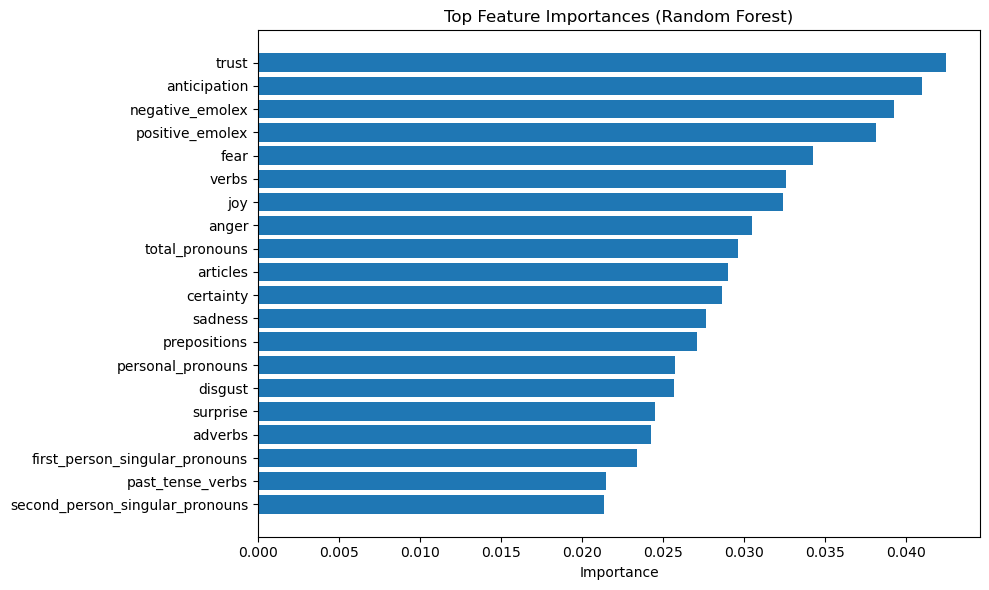

In [148]:
import matplotlib.pyplot as plt

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'][:top_n][::-1], importances_df['importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [149]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# Get feature names (ensure they match X_train)
feature_names = X_train.columns

# Get importances
importances = model.feature_importances_

# Combine into a DataFrame
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importances_df.head(10))  # Show top 10

/opt/anaconda3/envs/my475/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


            feature  importance
46     anticipation    0.063212
48  positive_emolex    0.061586
13            verbs    0.053987
20         articles    0.053551
49  negative_emolex    0.043576
21     prepositions    0.043258
43         surprise    0.039662
45            anger    0.033984
42             fear    0.033038
47          disgust    0.032941


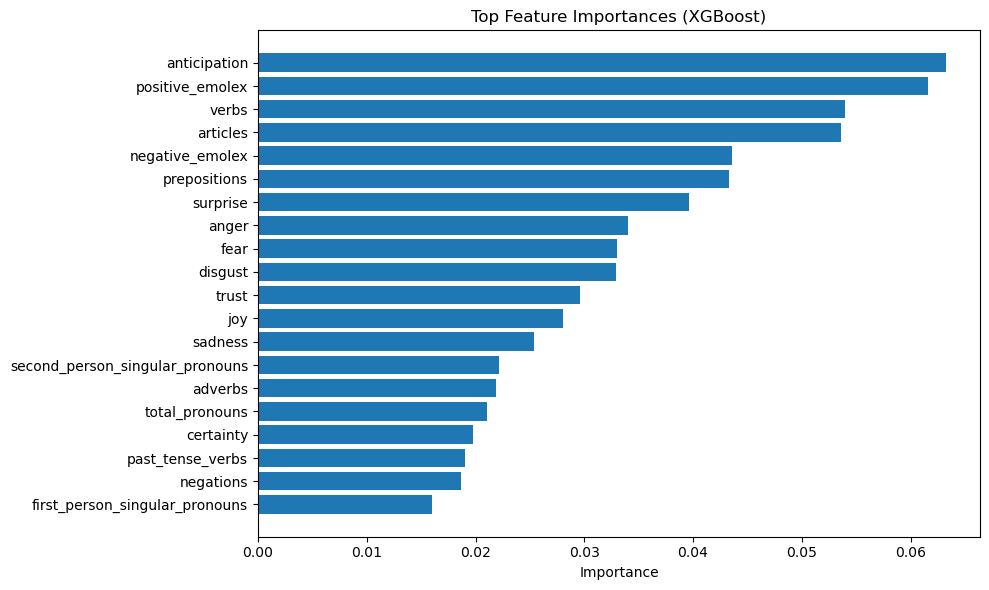

In [150]:
import matplotlib.pyplot as plt

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'][:top_n][::-1], importances_df['importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

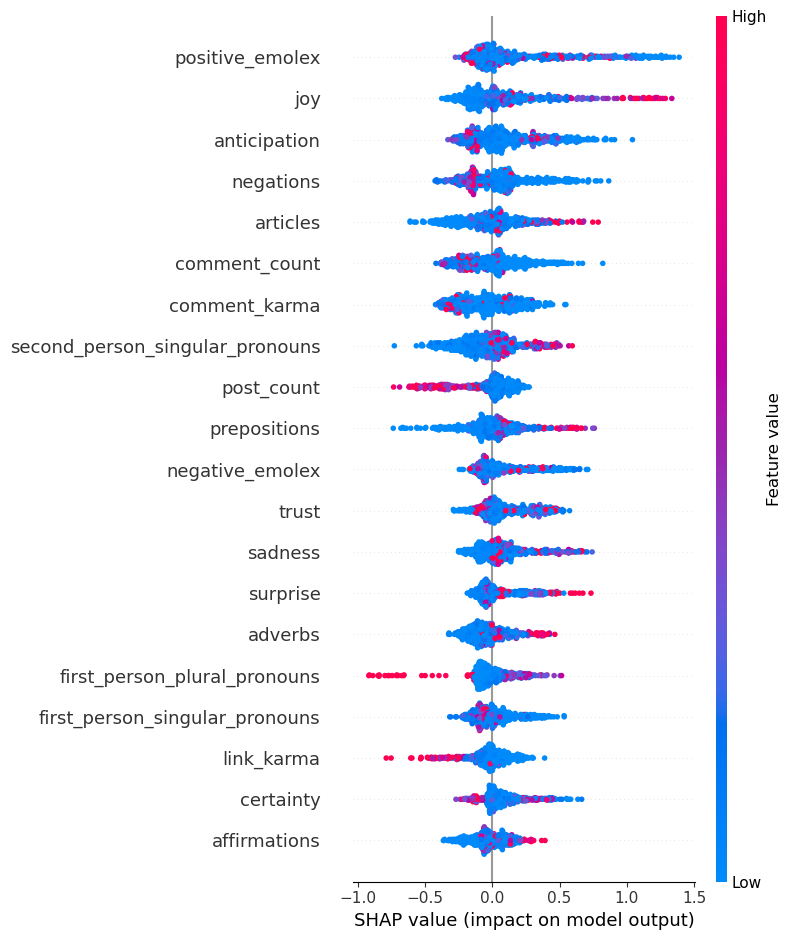

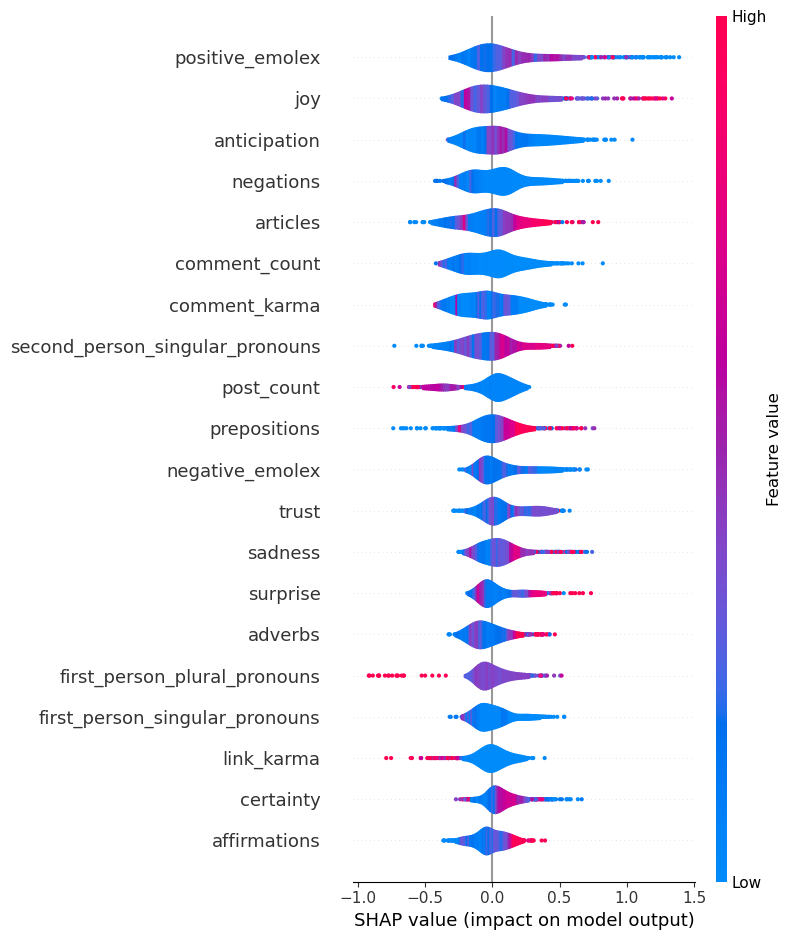

In [ ]:
import shap

model = tuned_models["XGBoost"]

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test_scaled)  # 注意保持使用与模型训练一致的缩放数据

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="violin")

import pandas as pd

# Convert scaled X back to DataFrame with original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Now you can use iloc safely
shap.force_plot(
    explainer.expected_value,
    shap_values[0],  # shap values for one sample
    X_test_scaled_df.iloc[0],  # the input feature values
    feature_names=X.columns
)

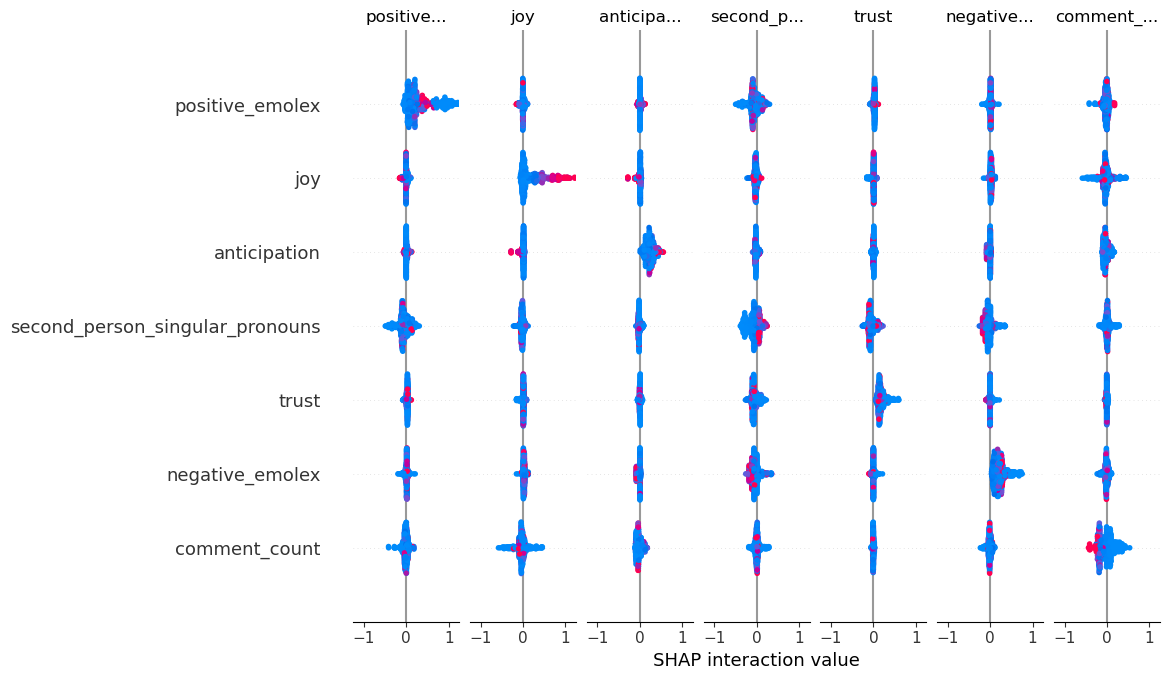

In [ ]:

shap_interaction_values = explainer.shap_interaction_values(X_test_scaled)

shap.summary_plot(shap_interaction_values, X_test_scaled, feature_names=X.columns)


In [68]:
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    print("shap_values[1].shape:", shap_values[1].shape)
else:
    print("shap_values.shape:", shap_values.shape)

print("X_test_scaled.shape:", X_test_scaled.shape)
print("X_test_scaled_df.shape:", X_test_scaled_df.shape)

Type of shap_values: <class 'numpy.ndarray'>
shap_values.shape: (558, 64, 2)
X_test_scaled.shape: (558, 64)
X_test_scaled_df.shape: (558, 64)


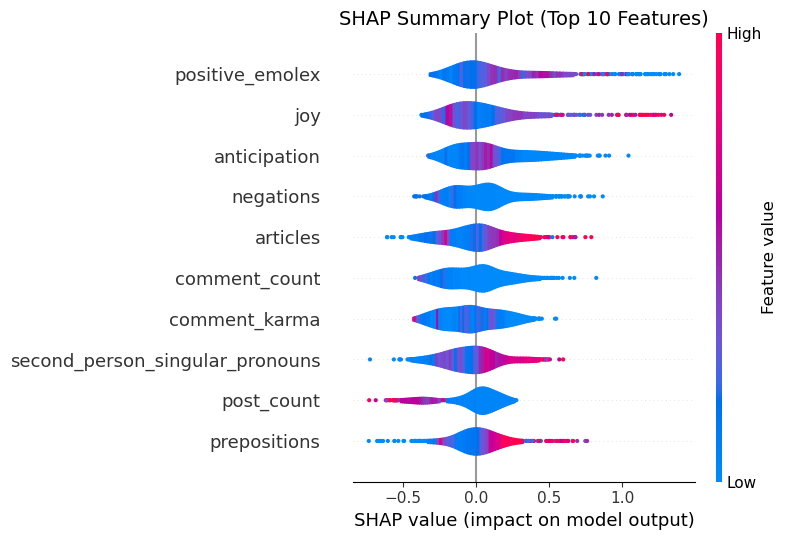

In [ ]:
import pandas as pd


model = tuned_models["XGBoost"]


explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_test_scaled) 

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)  # X 是原始 DataFrame

shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    plot_type="violin",
    max_display=10,
    show=False
)

plt.title("SHAP Summary Plot (Top 10 Features)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:

mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = pd.Series(mean_abs_shap, index=X_test.columns).sort_values(ascending=False)
print("Top 10 Features by Mean Absolute SHAP Value:")
print(top_features.head(10))

Top 10 Features by Mean Absolute SHAP Value:
positive_emolex                    0.270072
joy                                0.217953
anticipation                       0.205285
negations                          0.178721
articles                           0.175413
comment_count                      0.168659
comment_karma                      0.168545
second_person_singular_pronouns    0.161561
post_count                         0.152374
prepositions                       0.150409
dtype: float32


In [ ]:

mean_shap = shap_values.mean(axis=0) 
top_features_signed = pd.Series(mean_shap, index=X_test.columns).sort_values(ascending=False)

print("Top 10 Features by Mean SHAP Value (with sign):")
print(top_features_signed.head(10))

print("Bottom 10 Features by Mean SHAP Value (with sign):")
print(top_features_signed.tail(10))

Top 10 Features by Mean SHAP Value (with sign):
positive_emolex    0.198967
anticipation       0.104261
trust              0.093076
joy                0.092504
negative_emolex    0.087074
sadness            0.073005
certainty          0.072952
surprise           0.055855
negations          0.049136
anger              0.040189
dtype: float32
Bottom 10 Features by Mean SHAP Value (with sign):
tentative                         -0.015935
first_person_plural_pronouns      -0.016059
affirmations                      -0.017690
link_karma                        -0.024566
adverbs                           -0.028459
comment_karma                     -0.032679
past_tense_verbs                  -0.034004
third_person_plural_pronouns      -0.034978
second_person_singular_pronouns   -0.035156
post_count                        -0.052558
dtype: float32


In [ ]:
import pandas as pd
import numpy as np


top_features = [
    'positive_emolex', 'joy', 'anticipation',
    'second_person_singular_pronouns', 'post_count',
    'negations', 'comment_count', 'articles',
    'comment_karma', 'prepositions'
]


shap_df = pd.DataFrame(shap_values, columns=X_test_scaled_df.columns)


shap_df["label"] = y_test.reset_index(drop=True)


group_means = shap_df.groupby("label")[top_features].mean().T
group_means.columns = ["ED", "Recovery"]
group_means["Diff"] = group_means["Recovery"] - group_means["ED"]
group_means["Abs_Diff"] = group_means["Diff"].abs()


group_means = group_means.sort_values("Abs_Diff", ascending=False)

print("Top Features by Mean Absolute SHAP Value Difference:")
print(group_means.head(10))

Top Features by Mean Absolute SHAP Value Difference:
                                       ED  Recovery      Diff  Abs_Diff
positive_emolex                 -0.028410  0.410608  0.439018  0.439018
joy                             -0.059953  0.234409  0.294362  0.294362
anticipation                    -0.044828  0.243032  0.287860  0.287860
articles                        -0.118662  0.089082  0.207744  0.207744
prepositions                    -0.085147  0.104946  0.190093  0.190093
negations                       -0.048157  0.139697  0.187855  0.187855
second_person_singular_pronouns -0.126938  0.050274  0.177212  0.177212
comment_karma                   -0.119198  0.047853  0.167051  0.167051
comment_count                   -0.073265  0.071904  0.145169  0.145169
post_count                      -0.102706 -0.005880  0.096826  0.096826


In [59]:
shap_interaction_values = explainer.shap_interaction_values(X_test_scaled)

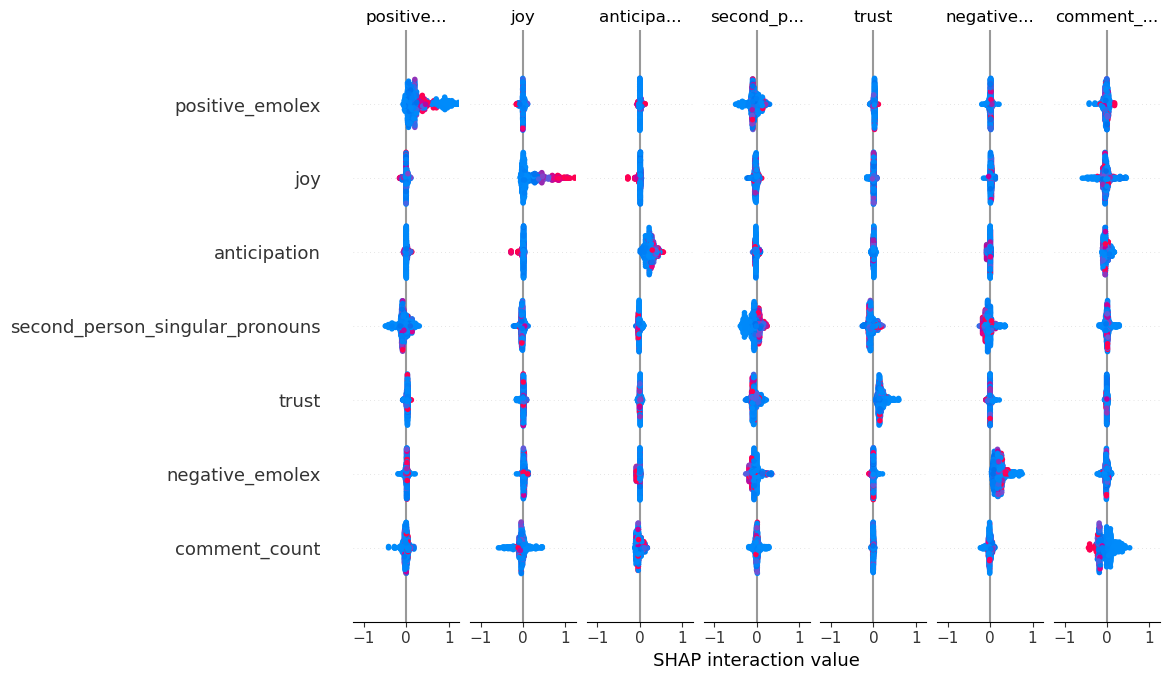

In [60]:
shap.summary_plot(shap_interaction_values, X_test_scaled, feature_names=X.columns)

In [ ]:
import shap
import numpy as np
import pandas as pd
from itertools import combinations


interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test_scaled_df)

feature_names = X_test_scaled_df.columns
n_features = len(feature_names)


interactions = []

for i in range(n_features):
    for j in range(i+1, n_features):
        mean_abs_inter = np.abs(interaction_values[:, i, j]).mean()
        interactions.append({
            "Feature A": feature_names[i],
            "Feature B": feature_names[j],
            "Mean |SHAP Interaction|": mean_abs_inter
        })

interactions_df = pd.DataFrame(interactions)
interactions_df = interactions_df.sort_values(by="Mean |SHAP Interaction|", ascending=False)

# 4. 取前5
top5_interactions = interactions_df.head(5)
top5_interactions

,Feature A,Feature B,Mean |SHAP Interaction|
1097,articles,positive_emolex,0.064957
961,negations,sadness,0.057353
170,second_person_singular_pronouns,positive_emolex,0.054261
1137,prepositions,anticipation,0.046277
1229,swearing,comment_karma,0.046120


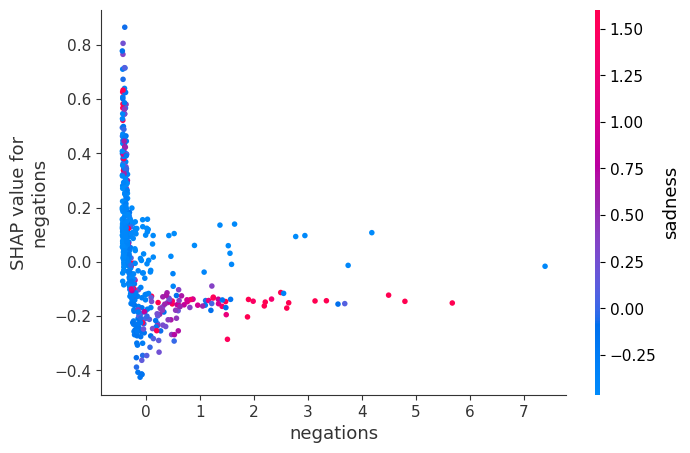

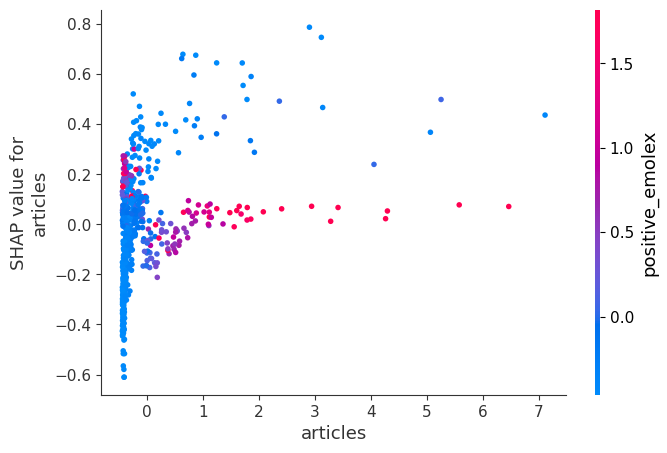

<Figure size 640x480 with 0 Axes>

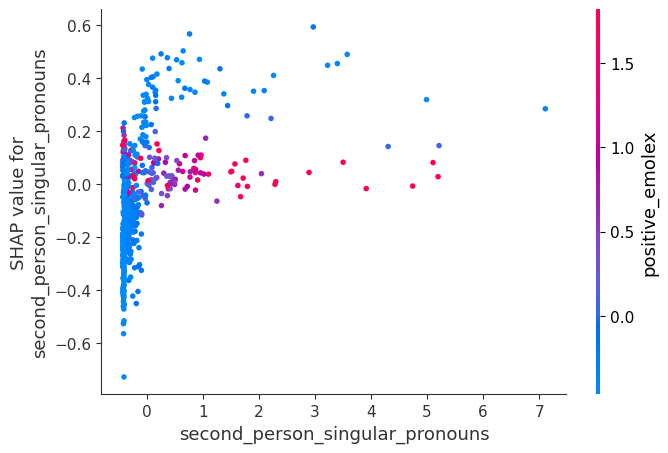

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt


shap.dependence_plot(
    "negations",
    shap_values,
    X_test_scaled,
    interaction_index="sadness",
    feature_names=X.columns
)
plt.show()


shap.dependence_plot(
    "articles",
    shap_values,
    X_test_scaled,
    interaction_index="positive_emolex",
    feature_names=X.columns
)
plt.tight_layout()
plt.show()


shap.dependence_plot(
    "second_person_singular_pronouns",
    shap_values,
    X_test_scaled,
    interaction_index="positive_emolex",
    feature_names=X.columns
)
plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import pandas as pd

target_feature = "negative_emolex"
feature_names = list(X_test_scaled_df.columns)
idx = feature_names.index(target_feature)

interaction_with_negemo = shap_interaction_values[:, idx, :]  # shape: (n_samples, n_features)


mean_signed_interactions = np.mean(interaction_with_negemo, axis=0)  # shape: (n_features,)


df_signed_interactions = pd.DataFrame({
    "Feature": feature_names,
    f"Mean SHAP Interaction with {target_feature}": mean_signed_interactions
})

df_signed_interactions = df_signed_interactions.sort_values(
    by=f"Mean SHAP Interaction with {target_feature}",
    ascending=False
).reset_index(drop=True)

df_signed_interactions.head(10)

,Feature,Mean SHAP Interaction with negative_emolex
0,negative_emolex,0.223017
1,joy,0.009782
2,sadness,0.002414
3,comment_karma,0.001952
4,friends,0.000817
5,positive_emolex,0.000739
6,social,0.000539
7,negative_emotion_liwc,0.000320
8,week_work_ratio,0.000181
9,awake_ratio,0.000176


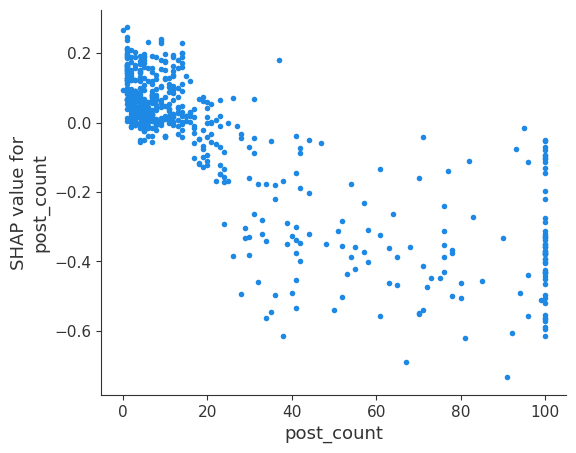

In [ ]:

feat_order = getattr(model, "feature_names_in_", None)
if feat_order is None:
    feat_order = X.columns.to_list()

features_raw = X_test   

features_for_plot = features_raw[feat_order]


sv = shap_values
if isinstance(sv, list):
    sv = sv[1]

assert sv.shape[1] == features_for_plot.shape[1], \
    f"shap_values columns {sv.shape[1]} and features columns {features_for_plot.shape[1]} are not aligned"

shap.dependence_plot(
    "post_count",
    sv,
    features_for_plot,
    feature_names=feat_order,
    interaction_index=None  
)